In [1]:
#import dependencies
import os
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#read in dataframe
features=pd.read_csv('../../data/iFeatureOmegaCLI_features.csv',index_col=0)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (290) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
label_dict=pd.Series(['NUMT','random'])
label_dict.index=[1,0]
features['label_name']=label_dict[features['label']].values

In [5]:
features

,Kmer_AAA,Kmer_AAC,Kmer_AAG,Kmer_AAT,Kmer_ACA,Kmer_ACC,Kmer_ACG,Kmer_ACT,Kmer_AGA,Kmer_AGC,...,Kmer_TTG.1,Kmer_TTT.1,NAC_A,NAC_C,NAC_G,NAC_T,label,order_label,order,label_name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.0,4.0,0.405811,0.134021,0.174321,0.285848,0,-1,NaN,random
1,0.016667,0.006667,0.006667,0.030000,0.013333,0.013333,0.006667,0.006667,0.010000,0.010000,...,8.0,13.0,0.121037,0.319885,0.322767,0.236311,0,-1,NaN,random
2,0.060185,0.041667,0.046296,0.037037,0.055556,0.023148,0.000000,0.009259,0.055556,0.004630,...,0.0,5.0,0.290598,0.162393,0.153846,0.393162,0,-1,NaN,random
3,0.011775,0.008410,0.013457,0.009251,0.020185,0.021867,0.005046,0.011775,0.017662,0.018503,...,5.0,6.0,0.290323,0.209677,0.080645,0.419355,0,-1,NaN,random
4,0.028866,0.020619,0.000000,0.024742,0.028866,0.002062,0.006186,0.004124,0.041237,0.002062,...,0.0,1.0,0.245132,0.182131,0.153494,0.214968,0,-1,NaN,random
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,...,0.0,0.0,0.228571,0.028571,0.300000,0.442857,1,14,Proboscidea,NUMT
79641,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.0,0.0,0.145161,0.096774,0.354839,0.403226,1,14,Proboscidea,NUMT
79642,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,...,6.0,3.0,0.093220,0.135593,0.338983,0.432203,1,14,Proboscidea,NUMT
79643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.029412,0.073529,0.485294,0.411765,1,14,Proboscidea,NUMT


In [4]:
X=features.drop(['label','order','order_label','label_name'],axis=1)

In [5]:
def plotter(curr_ax,title=None):
    kwargs={'edgecolor':'face'}
    scplot=sns.scatterplot(x='x',y='y',hue='label_name',data=features,s=10,palette='tab10',**kwargs)
    curr_ax.set(xticklabels=[],yticklabels=[])
    scplot.legend(title='Sequence',fontsize=15,title_fontsize=15,markerscale=2.5)#this is for the numt vs random umap
    curr_ax.set_xlabel('UMAP1',fontsize=20)
    curr_ax.set_ylabel('UMAP2',fontsize=20)
    #curr_ax.legend(bbox_to_anchor=(1,.9),title='Orders',prop={'size': 12})#this is for the order umap; change title Orders/Sequence
    plt.tight_layout()

In [6]:
def grid_search(n_neighbors,min_dist):
    X_scaled=StandardScaler().fit_transform(X)
    reducer=umap.UMAP(
            random_state=0,
            min_dist=min_dist,
            n_neighbors=n_neighbors
        )
    embedding=reducer.fit_transform(X_scaled,y=features['label'])#for NUMT vs random embedding, y=features['label']
    features['x'],features['y']=embedding[:,0],embedding[:,1]
    fig,axs=plt.subplots(1,1,figsize=(8.5,6.5))
    plotter(axs)
    #plt.savefig(f'../results/{n_neighbors}_nn_{min_dist}_md.png',dpi=400,bbox_inches='tight')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


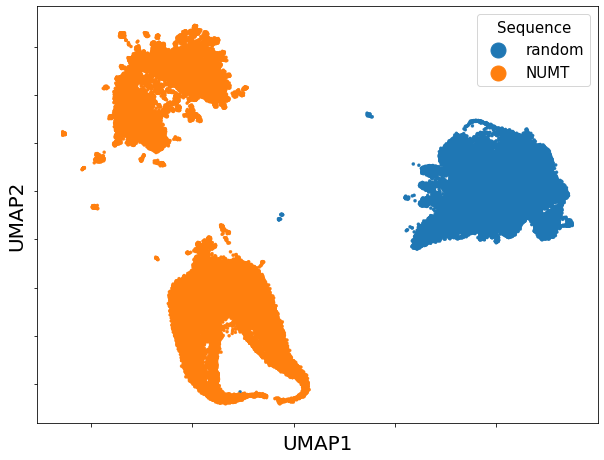

In [8]:
grid_search(400,.9)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


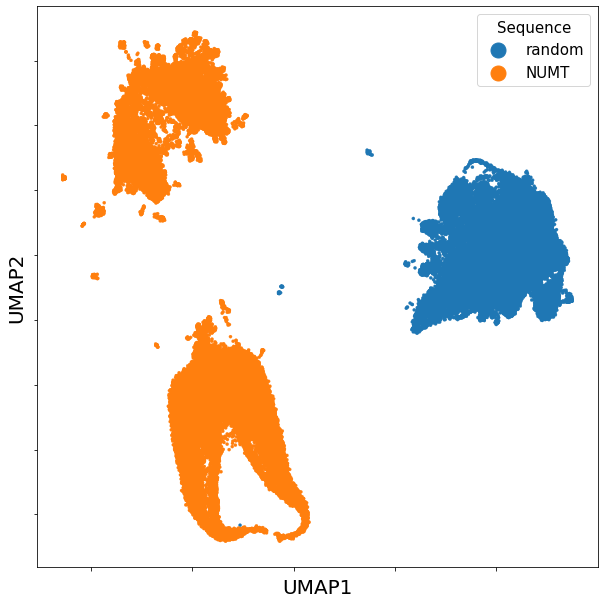

In [11]:
fig,axs=plt.subplots(figsize=(8.5,8.5))
plotter(axs)
plt.savefig('../../results/numt_random_umap.eps',dpi=400)

In [10]:
features[['label_name','x','y']].to_csv('../../data/numt_random_umap.csv')